In [1]:
import sys
sys.path.append("../")
import detect_organized as det
import roi
import display
import score

import cv2
import imutils
import skimage
from matplotlib import pyplot as plt
from skimage.color import rgb2gray

In [2]:
import numpy as np

In [3]:
plt.rcParams['figure.figsize'] = [10, 5]

In [4]:
im1_name = "../images/screen.jpg"
im2_name = "../images/find_the_screen.jpg"

In [5]:
img1 = skimage.io.imread(im1_name)
img1 = imutils.resize(img1, width=500)

img2 = skimage.io.imread(im2_name)
img2 = imutils.resize(img2, width=500)

In [6]:
master_img = img1
search_img = img2

In [7]:
boxes = roi.s_search(img2)

s_search start
s_search end


In [8]:
# img1 = skimage.io.imread("../images/screen.jpg")
img1 = cv2.imread(im1_name,0)
img1 = imutils.resize(img1, width=500)

# img2 = skimage.io.imread("../images/find_the_screen.jpg")
img2 = cv2.imread(im2_name,0)
img2 = imutils.resize(img2, width=500)

In [9]:
kp_master, rois = roi.check_roi_good(img1,img2,boxes,"surf", ratio=.7, modus="bf", crosscheck=True)

In [10]:
len(boxes)

325

In [11]:
len(rois)

178

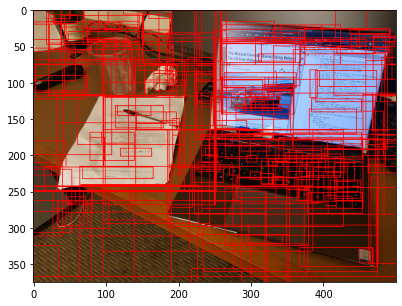

In [12]:
display.just_boxes(boxes,search_img)

# 60

In [38]:
idxs = score.basic_cutoff(rois, 90)

In [39]:
len(idxs)

6

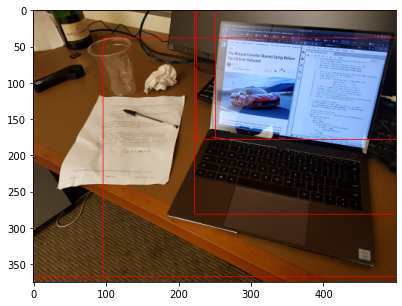

In [40]:
display.just_boxes_r(rois, search_img, idxs)

# 200

In [44]:
idxs = score.basic_cutoff(rois, 100)

In [45]:
len(idxs)

3

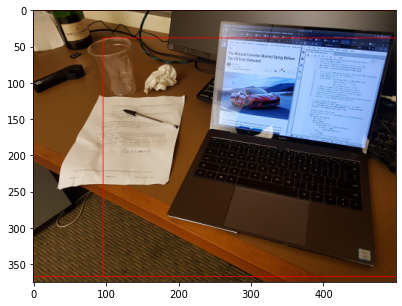

In [46]:
display.just_boxes_r(rois, search_img, idxs)

In [19]:
display.matchbox(kp_master, master_img, search_img, rois, idxs)

In [20]:
print(img2.shape)

(375, 500)


Testing for one basic square

In [21]:
kp_master1, rois1 = roi.check_roi_good(img1,img2,[(10,10,490,365)]
,"surf")

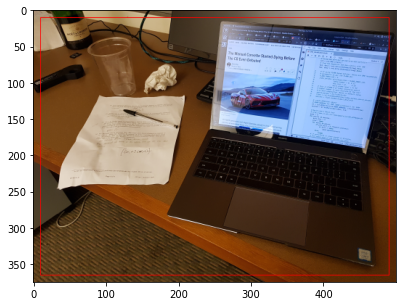

In [22]:
display.just_boxes([x[0] for x in rois1],search_img)

In [23]:
idxs1 = score.basic_cutoff(rois1, 10)

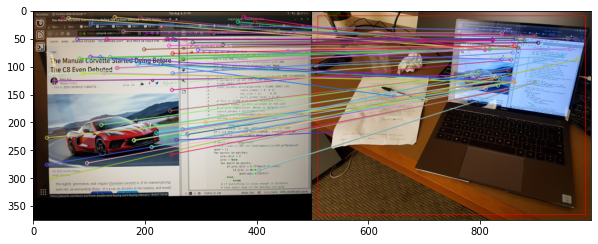

In [24]:
display.matchbox(kp_master1, master_img, search_img, rois1, idxs1)